In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To Load the dataset in Python environment

In [180]:
data=pd.read_csv('/content/train_loan.csv')

In [181]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


To view the information of dataset


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


To strip '+' from 'dependents feature' of the dataset


In [183]:
data['Dependents']=data['Dependents'].str.strip('+')

Explicitly changing the dependent feature (object) to float datatype

In [184]:
data['Dependents']=data['Dependents'].astype('float64')

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


To find the null values in the dataset


In [186]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

To change null values(numeric) to the median of each feature (if it is skewed)

In [187]:
num_col=['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']

In [188]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[num_col]=imputer.fit_transform(data[num_col])

In [189]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [190]:
cat_col=['Gender','Married','Self_Employed']

To change null values(categorical) to the mode of each feature

In [191]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data[cat_col]=imputer.fit_transform(data[cat_col])

In [192]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

finding the outlier

<Axes: ylabel='ApplicantIncome'>

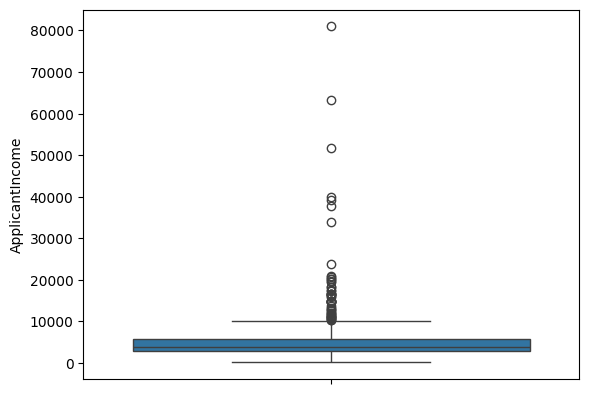

In [193]:
sns.boxplot(data['ApplicantIncome'])


In [194]:
q1=data['ApplicantIncome'].quantile(0.25)
q2=data['ApplicantIncome'].quantile(0.5)
q3=data['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
print(iqr)

2917.5


In [195]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

10171.25
-1498.75


In [196]:
# to cap the outliers
def limit_imputer(value):
  if value>upper_lim:
    return upper_lim
  if value<lower_lim:
    return lower_lim
  else:
    return value


In [197]:
 data['ApplicantIncome']=data['ApplicantIncome'].apply(limit_imputer)

In [198]:

data['ApplicantIncome'].describe()

count      614.000000
mean      4617.111564
std       2479.851729
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      10171.250000
Name: ApplicantIncome, dtype: float64

In [199]:
#finding outlier in 'CoapplicantIncome'

<Axes: ylabel='CoapplicantIncome'>

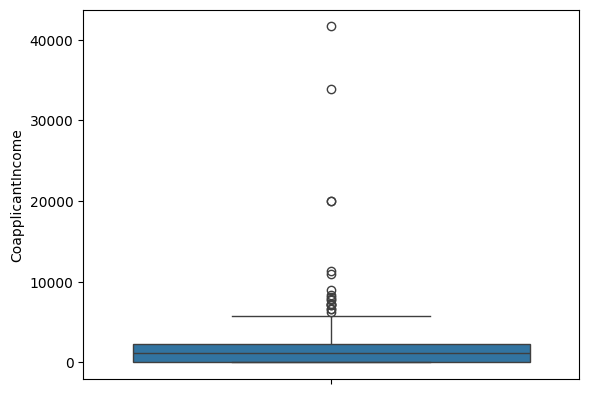

In [200]:
sns.boxplot(data['CoapplicantIncome'])


In [201]:
Q1=data['CoapplicantIncome'].quantile(0.25)
Q2=data['CoapplicantIncome'].quantile(0.5)
Q3=data['CoapplicantIncome'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

2297.25


In [202]:
up_lim=Q3+(1.5*IQR)
lo_lim=Q1-(1.5*IQR)
print(up_lim)
print(lo_lim)

5743.125
-3445.875


In [203]:
# to cap the outliers
def lim_imputer(value):
  if value>up_lim:
    return up_lim
  if value<lo_lim:
    return lo_lim
  else:
    return value

In [204]:
data['CoapplicantIncome']=data['CoapplicantIncome'].apply(lim_imputer)

In [205]:
data['CoapplicantIncome'].describe()

count     614.000000
mean     1419.702231
std      1624.605892
min         0.000000
25%         0.000000
50%      1188.500000
75%      2297.250000
max      5743.125000
Name: CoapplicantIncome, dtype: float64

Checking whether the outlier is handled

<Axes: ylabel='CoapplicantIncome'>

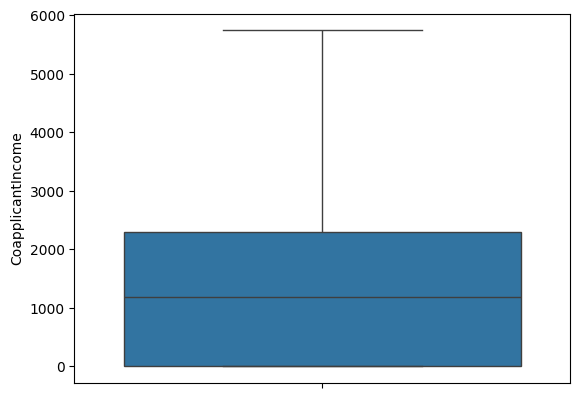

In [206]:
sns.boxplot(data['CoapplicantIncome'])

finding outlier in 'LoanAmount' feature

<Axes: ylabel='LoanAmount'>

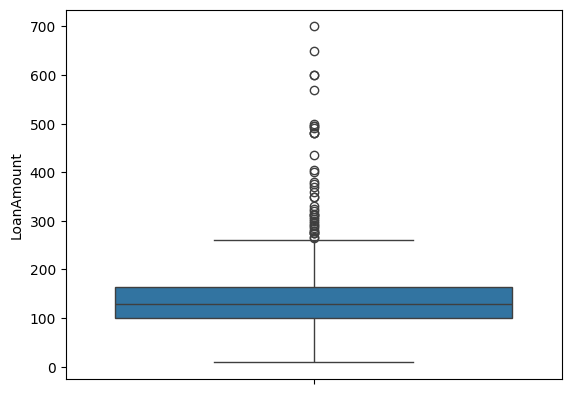

In [207]:

sns.boxplot(data['LoanAmount'])


In [208]:
q_1=data['LoanAmount'].quantile(0.25)
q_2=data['LoanAmount'].quantile(0.5)
q_3=data['LoanAmount'].quantile(0.75)
i_qr=q_3-q_1
print(i_qr)

64.5


In [209]:
low_lim=q_1-(1.5*i_qr)
upp_lim=q_3+(1.5*i_qr)
print(low_lim)
print(upp_lim)

3.5
261.5


capping the outlier


In [210]:
def lt_imputer(value):
  if value>upp_lim:
    return upp_lim
  if value<low_lim:
    return low_lim
  else:
    return value

In [211]:
data['LoanAmount']=data['LoanAmount'].apply(lt_imputer)

In [212]:
data['LoanAmount'].describe()

count    614.000000
mean     137.365635
std       55.779749
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      261.500000
Name: LoanAmount, dtype: float64

finding outliers in 'Loan_Amount_Term' feature

<Axes: ylabel='Loan_Amount_Term'>

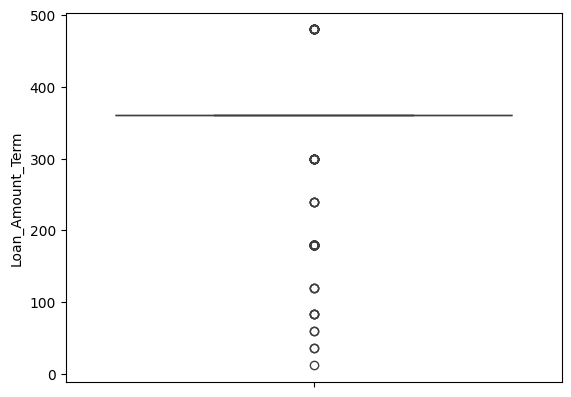

In [213]:
sns.boxplot(data['Loan_Amount_Term'],whis=0.05)

to cap the outliers

In [214]:
Q_1=data['Loan_Amount_Term'].quantile(0.25)
Q_2=data['Loan_Amount_Term'].quantile(0.5)
Q_3=data['Loan_Amount_Term'].quantile(0.75)
I_qr=Q_3-Q_1
print(I_qr)

0.0


In [215]:
Low_lim=Q_1-(1.5*I_qr)
Upp_lim=Q_3+(1.5*I_qr)
print(Low_lim)
print(Upp_lim)

360.0
360.0


In [216]:
def Lim_imputer(value):
  if value>Upp_lim:
    return Upp_lim
  if value<Low_lim:
    return Low_lim
  else:
    return value

In [217]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].apply(Lim_imputer)

In [218]:
data['Loan_Amount_Term'].describe()

count    614.0
mean     360.0
std        0.0
min      360.0
25%      360.0
50%      360.0
75%      360.0
max      360.0
Name: Loan_Amount_Term, dtype: float64

<Axes: ylabel='Loan_Amount_Term'>

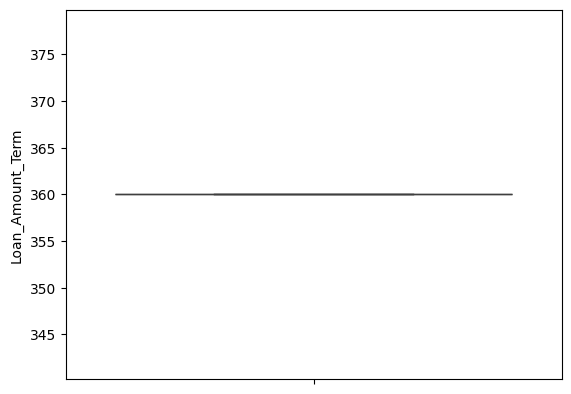

In [219]:
sns.boxplot(data['Loan_Amount_Term'],whis=0.05)

In [220]:
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


Label Encoding

In [221]:
x=data.drop('Loan_Status',axis=1) #independant feature

In [222]:
y=data['Loan_Status'] # target feature

In [223]:
from sklearn.preprocessing import LabelEncoder

In [224]:
le=LabelEncoder()

In [225]:
x['Married']=le.fit_transform(x['Married'])

In [226]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,0,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,LP001003,Male,1,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,1,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,1,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,0,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,1,3.0,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural
611,LP002983,Male,1,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,1,2.0,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban


In [227]:
x['Self_Employed']=le.fit_transform(x['Self_Employed'])

In [228]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,0,0.0,Graduate,0,5849.0,0.0,128.0,360.0,1.0,Urban
1,LP001003,Male,1,1.0,Graduate,0,4583.0,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,1,0.0,Graduate,1,3000.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,1,0.0,Not Graduate,0,2583.0,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,0,0.0,Graduate,0,6000.0,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0.0,Graduate,0,2900.0,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,1,3.0,Graduate,0,4106.0,0.0,40.0,360.0,1.0,Rural
611,LP002983,Male,1,1.0,Graduate,0,8072.0,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,1,2.0,Graduate,0,7583.0,0.0,187.0,360.0,1.0,Urban


In [229]:
x['Loan_ID']=le.fit_transform(x['Loan_ID'])
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,Male,0,0.0,Graduate,0,5849.0,0.0,128.0,360.0,1.0,Urban
1,1,Male,1,1.0,Graduate,0,4583.0,1508.0,128.0,360.0,1.0,Rural
2,2,Male,1,0.0,Graduate,1,3000.0,0.0,66.0,360.0,1.0,Urban
3,3,Male,1,0.0,Not Graduate,0,2583.0,2358.0,120.0,360.0,1.0,Urban
4,4,Male,0,0.0,Graduate,0,6000.0,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,Female,0,0.0,Graduate,0,2900.0,0.0,71.0,360.0,1.0,Rural
610,610,Male,1,3.0,Graduate,0,4106.0,0.0,40.0,360.0,1.0,Rural
611,611,Male,1,1.0,Graduate,0,8072.0,240.0,253.0,360.0,1.0,Urban
612,612,Male,1,2.0,Graduate,0,7583.0,0.0,187.0,360.0,1.0,Urban


One hot encoding


In [230]:
x=pd.get_dummies(x)
x

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0.0,0,5849.0,0.0,128.0,360.0,1.0,0,1,1,0,0,0,1
1,1,1,1.0,0,4583.0,1508.0,128.0,360.0,1.0,0,1,1,0,1,0,0
2,2,1,0.0,1,3000.0,0.0,66.0,360.0,1.0,0,1,1,0,0,0,1
3,3,1,0.0,0,2583.0,2358.0,120.0,360.0,1.0,0,1,0,1,0,0,1
4,4,0,0.0,0,6000.0,0.0,141.0,360.0,1.0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0.0,0,2900.0,0.0,71.0,360.0,1.0,1,0,1,0,1,0,0
610,610,1,3.0,0,4106.0,0.0,40.0,360.0,1.0,0,1,1,0,1,0,0
611,611,1,1.0,0,8072.0,240.0,253.0,360.0,1.0,0,1,1,0,0,0,1
612,612,1,2.0,0,7583.0,0.0,187.0,360.0,1.0,0,1,1,0,0,0,1


In [231]:
#target column encoding
y = le.fit_transform(y)

In [232]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

Minmax Scaling


In [233]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [234]:
x.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']] = min_max.fit_transform(x[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])

In [235]:
x

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0.0,0,0.568692,0.000000,0.471287,0.0,1.0,0,1,1,0,0,0,1
1,1,1,1.0,0,0.442360,0.262575,0.471287,0.0,1.0,0,1,1,0,1,0,0
2,2,1,0.0,1,0.284396,0.000000,0.225743,0.0,1.0,0,1,1,0,0,0,1
3,3,1,0.0,0,0.242784,0.410578,0.439604,0.0,1.0,0,1,0,1,0,0,1
4,4,0,0.0,0,0.583760,0.000000,0.522772,0.0,1.0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0.0,0,0.274417,0.000000,0.245545,0.0,1.0,1,0,1,0,1,0,0
610,610,1,3.0,0,0.394761,0.000000,0.122772,0.0,1.0,0,1,1,0,1,0,0
611,611,1,1.0,0,0.790520,0.041789,0.966337,0.0,1.0,0,1,1,0,0,0,1
612,612,1,2.0,0,0.741724,0.000000,0.704950,0.0,1.0,0,1,1,0,0,0,1
